
**Introduction**

The exploration of spatial domains for resource optimization represents a fundamental challenge across a myriad of scientific and engineering disciplines. This challenge is particularly pronounced in fields where decision-making is constrained by limited information and financial costs. In this paper, we investigate a problem setup where a spatial domain, which can be one, two, or three-dimensional, is discretized into a grid of cells, each harboring a value that is unknown until explicitly revealed. This setup models real-world situations such as mineral exploration, environmental sampling, and even financial markets, where the acquisition of information is costly, and decisions must be made under uncertainty.

Central to our investigation is the concept of a Random Field (RF), a mathematical framework where each point in a spatial domain is associated with a random variable. The values of these variables are spatially correlated, making the RF a powerful tool for modeling spatial phenomena. In the context of our problem, the RF represents the distribution of values across the grid, and the challenge lies in maximizing the net gain—the sum of the values of the cells selected, minus the cost of selection.

Our exploration is structured around three distinct scenarios, each representing varying levels of knowledge about the underlying RF generating function:

1. **Scenario 1 - Known Generating Function:** In this idealized scenario, the exact function generating the RF is known, though the specific values it yields remain hidden until selected. This scenario allows for a sophisticated balance between exploration (learning about unselected cells) and exploitation (selecting cells with presumably high values).

2. **Scenario 2 - Known Function Class:** A more realistic scenario where the class of the generating function (e.g., Gaussian kernel) is known, but its parameters are not. This necessitates the estimation of these parameters from observed data, introducing an additional layer of complexity and uncertainty.

3. **Scenario 3 - Unknown Function and Class:** This theoretical scenario represents a situation of maximum uncertainty, akin to exploring entirely unknown territories. It mimics real-world challenges such as oil and gas reservoir development, where the underlying distributions are often poorly understood. 

This paper aims to not only delve into the theoretical underpinnings of these scenarios but also to provide practical algorithms and strategies. We will explore how knowledge, or the lack thereof, about the RF generating function impacts decision-making strategies. The goal is to develop a framework that can be adapted to various real-world applications, where decisions must be made under uncertainty, with limited information, and often, under significant financial constraints.

In the following sections, we will first define the problem in detail, laying out the mathematical foundation of our investigation. We will then proceed to analyze each scenario, developing and comparing strategies based on their effectiveness in maximizing net gain under their respective conditions.

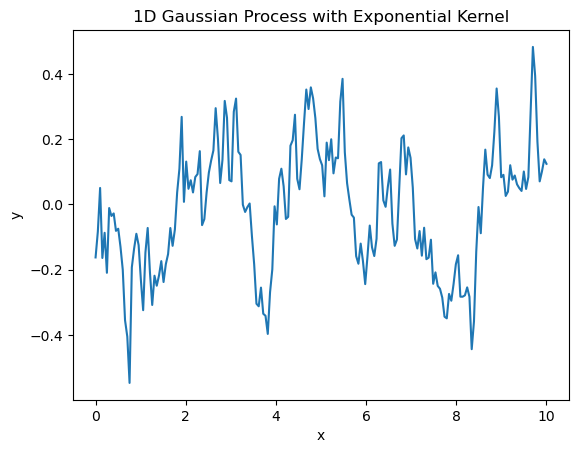

In [25]:
import numpy as np
import GPy
import matplotlib.pyplot as plt

# Define the 1D domain
x = np.linspace(0, 10, 200)[:, None]  # 100 points from 0 to 10

# Define the kernel
kernel = GPy.kern.Exponential(input_dim=1, variance=1., lengthscale=10)

# Create Gaussian Process
gp = GPy.models.GPRegression(x, np.zeros((200, 1)), kernel)

# Generate random field values
y_samples = gp.posterior_samples_f(x, full_cov=False, size=1)
y_samples = y_samples[:, :, 0]

# Plot
plt.plot(x, y_samples)
plt.title("1D Gaussian Process with Exponential Kernel")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


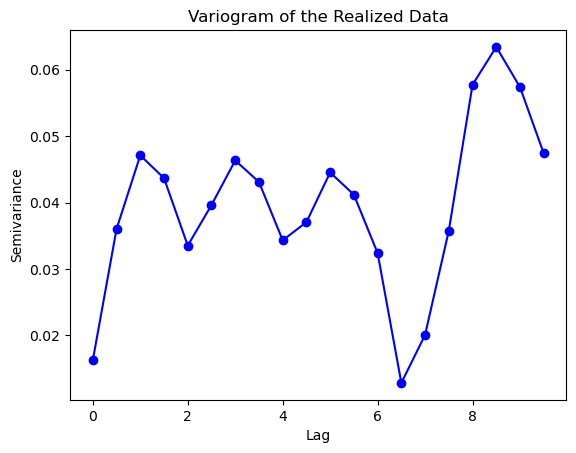

In [26]:
def calculate_variogram(data, x, lag, lag_tolerance):
    """Calculate the variogram values for given data."""
    N = len(data)
    vario_values = []

    for h in np.arange(0, lag, lag_tolerance):
        pairs = []
        for i in range(N):
            for j in range(N):
                if h <= abs(x[i] - x[j]) < h + lag_tolerance:
                    pairs.append((data[i] - data[j])**2)
        
        if len(pairs) > 0:
            vario_values.append((h, np.sum(pairs) / (2 * len(pairs))))

    return np.array(vario_values)

# Calculate the variogram
lag = 10  # maximum lag distance
lag_tolerance = 0.5  # lag tolerance
variogram = calculate_variogram(y_samples.flatten(), x.flatten(), lag, lag_tolerance)

# Plot the variogram
plt.plot(variogram[:, 0], variogram[:, 1], 'bo-')
plt.title("Variogram of the Realized Data")
plt.xlabel("Lag")
plt.ylabel("Semivariance")
plt.show()


## Notes


Problem Setup:
- We have a 1D,2D, or 3D spatial domain
- The spatial domain is divided into a grid of cells
- Each grid of cell has a value associated with it
- We have a game that progresses forward in time where we can choose to obsere and collect the value of a cell at each time step at a cost of $c$ units.
- All cell values are unknown until they are selected at the cost of $c$ units.
- The goal is to maximize the sum of the values of the cells selected minus the cost of selecting the cells.
- There are three different types of scenarios as we shall see.
- The values are distributed spaccially according to a random field.



What is the definition of a random field?
RF Definition:



Scenarios
- secnario 1: Know the ground truth RF generating function. You don't know the values of the RF at each cell, but you know the function that generates the RF. As you collect more information, you can update your belief about the unknown values in the RF more quickly than in scenario 2. More specifically, you know the class and paramaters of the generating function. This scenario requires you to optimally balance exploration and exploitation.
- scenario 2: Don't know the ground truth RF generating function, but know the class of functions (i.e. Gaussian kernel, spherical kernel, etc.). More specifically, you know the class of functions, but not the paramaters of the generating function. These have to be estimated from the data. This scenario requires you to optimally balance exploration and exploitation, but you have to estimate the paramaters of the generating function from the data.
- scenario 3: Don't know the ground truth RF generating function, and don't know the class of functions. This scenario is more of theoretical interest. I'm thinking about this scenario as it relates to oil and gas reservoir development. Geostatistics is commonly used, but the true generating function and class may be very different than anything we work with. The question is does our strategy developed in the first two scenarios still work here?


